# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Kaggle Titanic DataSet**
>
>This dataset was one of the first I worked on and today I feel able to explore it better and with more techniques.
>
>Extension: .csv
>
>Source: https://www.kaggle.com/azeembootwala/titanic
>
>Date: 01-02-2022
>
> **Main Skills of this project:** 
> - **Data Preparation**
> - **Data Cleansing**  
> - **Data Wrangling**  
> - Data pre-processing
> - Exploratory Data Analysis (EAD)
> - Data Visualization

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing DataSet
- pandas.read_csv — pandas 1.3.5 documentation (pydata.org)

In [2]:
path = r"C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Titanic\titanic_preprocessed.csv"
df = pd.read_csv(path, sep =',')

In [3]:
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,male,S
887,1.0,1.0,19.0,0.0,0.0,30.0000,female,S
888,0.0,3.0,20.0,1.0,2.0,23.4500,female,S
889,1.0,1.0,26.0,0.0,0.0,30.0000,male,C


> - Embarked indicates the city in which they boarded.  
> It is not needed for the M.L. 

In [4]:
df.drop('Embarked', axis=1, inplace=True)

> Sex must be converted to numeric variable

## Using One Hot Encoder

In [5]:
df_cat = df[['Sex']]
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()

df_cat = pd.DataFrame(df_cat)

df = pd.concat([df, df_cat], axis = 1)

In [6]:
df.drop('Sex', axis=1, inplace=True)

In [7]:
df_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female', 'Male']
df.columns = df_names

In [8]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0
888,0.0,3.0,20.0,1.0,2.0,23.4500,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0


# Are ther any collinearity?

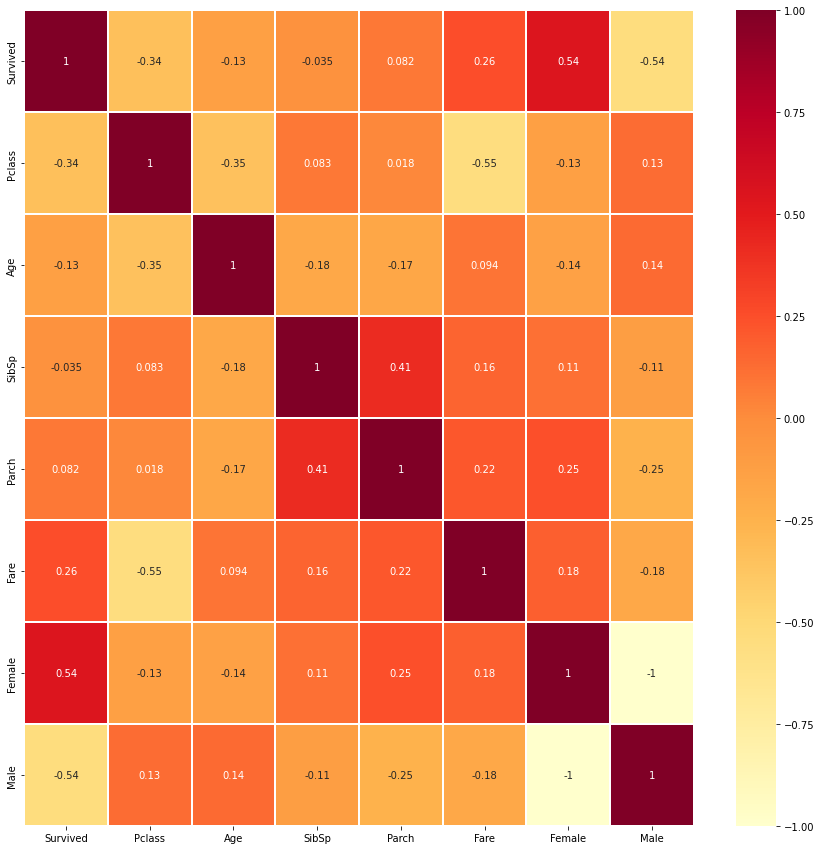

In [9]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, cmap = "YlOrRd", linewidths=0.1, annot = True);

In [10]:
correlations = df.corr()['Survived'].sort_values()
correlations

Male       -0.543351
Pclass     -0.338481
Age        -0.126637
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Female      0.543351
Survived    1.000000
Name: Survived, dtype: float64

> **Ther are no strong collinearity**

# Balancing the data

In [11]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

## SMOTE

In [12]:
y = df['Survived']
X = df.drop('Survived', axis=1)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority') # not majority
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

# Separating Training and Testing variables

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
%%capture
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

In [17]:
y_pred = logistic.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, y_pred)

0.7757575757575758

In [20]:
from sklearn.metrics import confusion_matrix

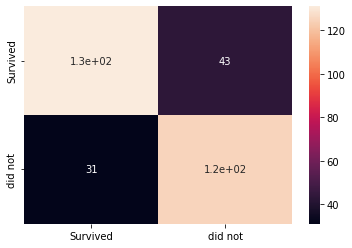

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,  xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [23]:
precision_score(y_test, y_pred)

0.7440476190476191

In [24]:
recall_score(y_test, y_pred)

0.8012820512820513

In [25]:
f1_score(y_test, y_pred, average='macro')

0.775683421516755

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       174
         1.0       0.74      0.80      0.77       156

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion = 'gini', random_state=0, splitter = 'best', max_depth = 10, max_leaf_nodes = None, ccp_alpha=0.010)

In [28]:
clf = clf.fit(X_train, y_train)

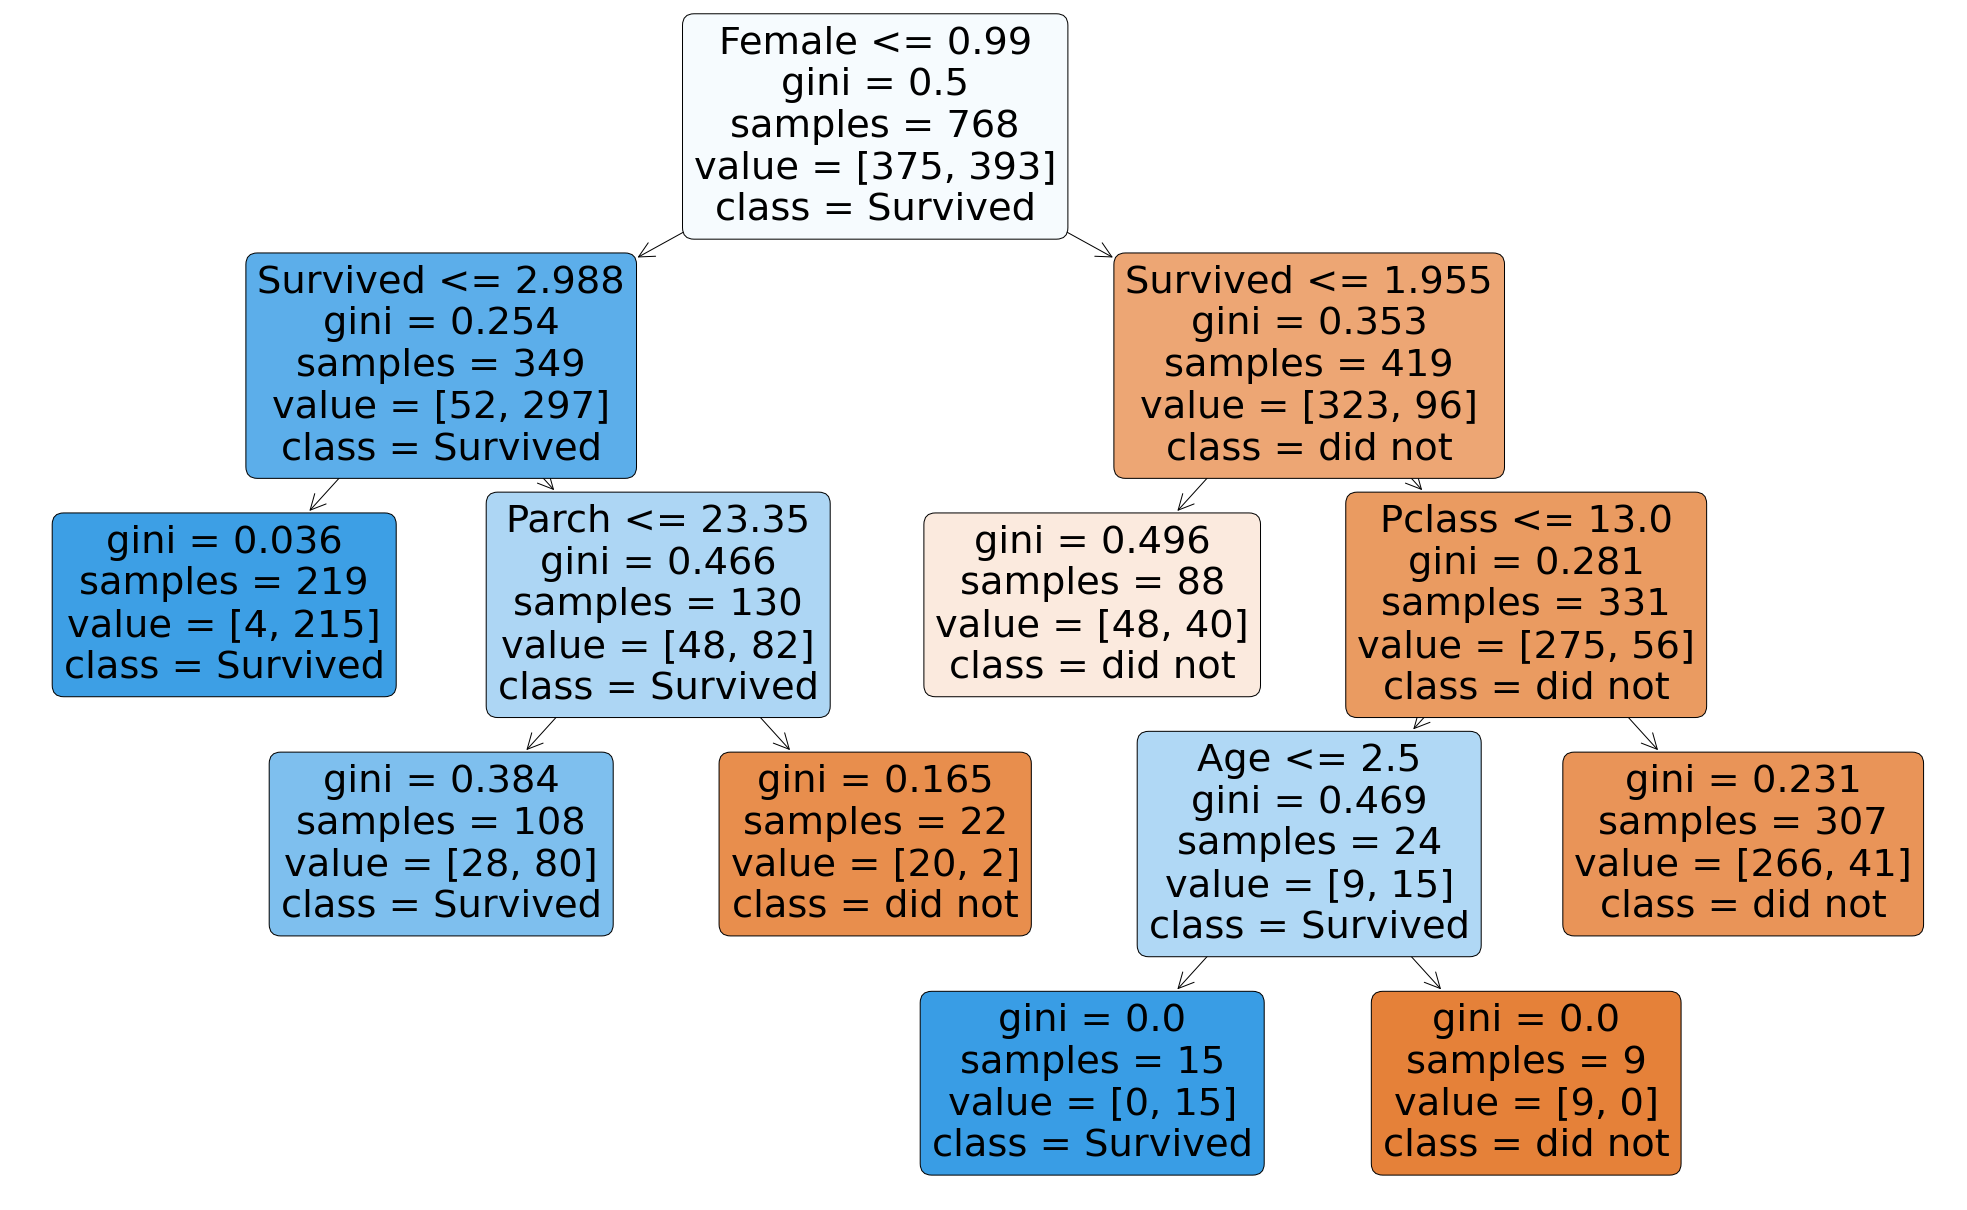

In [29]:
plt.figure(figsize=[35,22])
tree = tree.plot_tree(clf, filled = True, rounded = True, class_names = ["did not", "Survived"], feature_names = df.columns)

C:\Users\lucas\anaconda3\envs\NewDataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


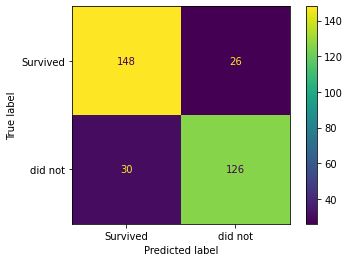

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels = ["Survived", "did not"])
plt.show()

In [31]:
path = clf.cost_complexity_pruning_path(X_train, y_train) # determine value for alpha
ccp_alphas = path.ccp_alphas # extract diferent values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini', random_state=0, splitter = 'best', max_depth = 10, max_leaf_nodes = None, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)

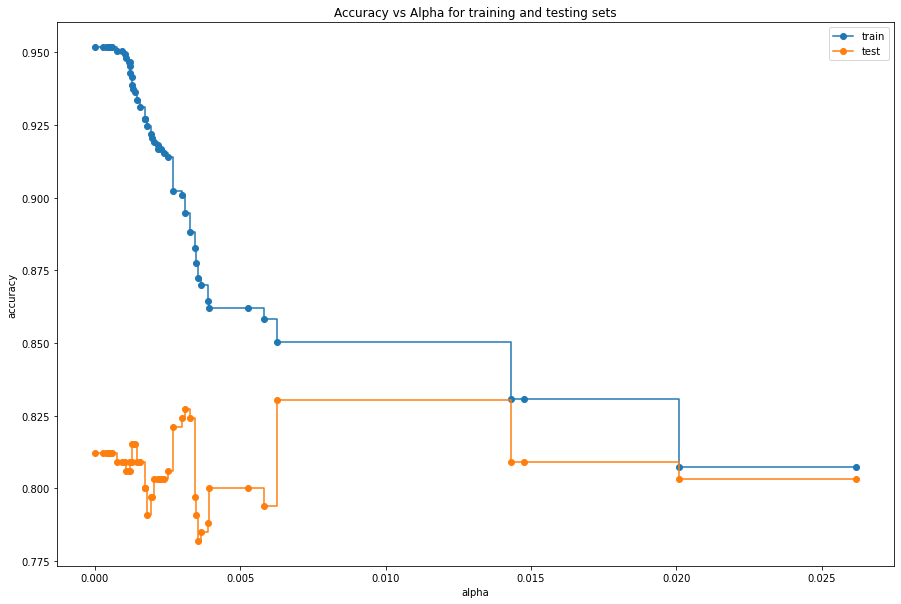

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clf_dts]
test_scores = [clf.score(X_test, y_test) for clf in clf_dts]

fig, ax = plt.subplots(figsize=[15,10]) 
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       174
         1.0       0.74      0.80      0.77       156

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
%%capture
forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=0, max_depth = 10, max_leaf_nodes = None, ccp_alpha=0.004) # padrão = 100 arvores
forest.fit(X_train, y_train)

In [36]:
y_pred = forest.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.8303030303030303

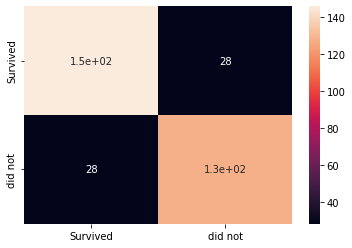

In [38]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       174
         1.0       0.82      0.82      0.82       156

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



## Artificial Neural Network

In [40]:
import tensorflow as tf

In [41]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 7, activation='relu', input_shape=(7,)))
rede_neural.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [42]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [44]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 5.9320 - accuracy: 0.5117
Epoch 2/200
24/24 [==============================] - 0s 991us/step - loss: 4.0228 - accuracy: 0.5117
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 2.6788 - accuracy: 0.5117
Epoch 4/200
24/24 [==============================] - 0s 892us/step - loss: 1.7206 - accuracy: 0.5117
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 1.1830 - accuracy: 0.5404
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.9176 - accuracy: 0.6562
Epoch 7/200
24/24 [==============================] - 0s 920us/step - loss: 0.7943 - accuracy: 0.6576
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.6484
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6445
Epoch 10/200
24/24 [==============================] - 0s 994us/step - loss: 0.6718 - accuracy: 0.6445
E

24/24 [==============================] - 0s 946us/step - loss: 0.5428 - accuracy: 0.7461
Epoch 83/200
24/24 [==============================] - 0s 955us/step - loss: 0.5389 - accuracy: 0.7565
Epoch 84/200
24/24 [==============================] - 0s 998us/step - loss: 0.5311 - accuracy: 0.7643
Epoch 85/200
24/24 [==============================] - 0s 923us/step - loss: 0.5265 - accuracy: 0.7786
Epoch 86/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7865
Epoch 87/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7799
Epoch 88/200
24/24 [==============================] - 0s 985us/step - loss: 0.5121 - accuracy: 0.7812
Epoch 89/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7917
Epoch 90/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7969
Epoch 91/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7943
Epo

24/24 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8242
Epoch 163/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8294
Epoch 164/200
24/24 [==============================] - 0s 922us/step - loss: 0.3955 - accuracy: 0.8320
Epoch 165/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8268
Epoch 166/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8268
Epoch 167/200
24/24 [==============================] - 0s 891us/step - loss: 0.3926 - accuracy: 0.8333
Epoch 168/200
24/24 [==============================] - 0s 852us/step - loss: 0.3902 - accuracy: 0.8359
Epoch 169/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8320
Epoch 170/200
24/24 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8281
Epoch 171/200
24/24 [==============================] - 0s 917us/step - loss: 0.3957 - accuracy: 0.8

In [45]:
y_pred = rede_neural.predict(X_test)
y_pred = (y_pred >= 0.4)

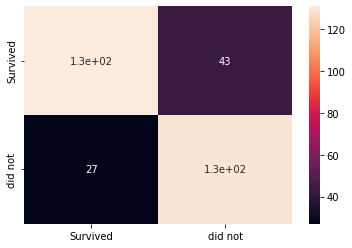

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79       174
         1.0       0.75      0.83      0.79       156

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



> Three methods of Machine Learning were explored and one of Neural Networks.  
> Of all of them, the one that presented the best accuracy was Randon Forest with 83% accuracy.